In [28]:
from keras.datasets import mnist
import sys
import numpy as np

In [2]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [3]:
print('학습 셋 이미지 수 : %d 개' % (X_train.shape[0]))
print('테스트셋 이미지 수 : %d 개' %(X_test.shape[0]))

학습 셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


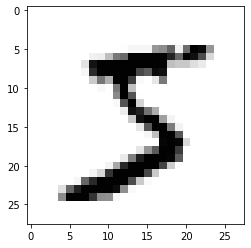

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

In [10]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [11]:
X_train = X_train.reshape(X_train.shape[0], 784)

In [12]:
X_train = X_train.astype('float64')
X_train = X_train / 255

In [13]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [14]:
print('class : %d' %(Y_class_train[0]))

class : 5


In [15]:
# 원핫 인코딩

from keras.utils.np_utils import to_categorical

Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)

In [16]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [17]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

In [18]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [19]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

In [21]:
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [22]:
model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [23]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [24]:
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

In [25]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 30, batch_size = 200, verbose = 0, callbacks = [early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.14960, saving model to ./model/01-0.1496.hdf5

Epoch 00002: val_loss improved from 0.14960 to 0.10114, saving model to ./model/02-0.1011.hdf5

Epoch 00003: val_loss improved from 0.10114 to 0.08426, saving model to ./model/03-0.0843.hdf5

Epoch 00004: val_loss improved from 0.08426 to 0.07223, saving model to ./model/04-0.0722.hdf5

Epoch 00005: val_loss improved from 0.07223 to 0.06891, saving model to ./model/05-0.0689.hdf5

Epoch 00006: val_loss improved from 0.06891 to 0.06411, saving model to ./model/06-0.0641.hdf5

Epoch 00007: val_loss improved from 0.06411 to 0.05900, saving model to ./model/07-0.0590.hdf5

Epoch 00008: val_loss did not improve from 0.05900

Epoch 00009: val_loss did not improve from 0.05900

Epoch 00010: val_loss did not improve from 0.05900

Epoch 00011: val_loss did not improve from 0.05900

Epoch 00012: val_loss did not improve from 0.05900

Epoch 00013: val_loss did not improve from 0.05900

Epoch 00014: val_lo

In [26]:
print('\n Test Accuracy : %.4f' %(model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 0s 45us/step

 Test Accuracy : 0.9818


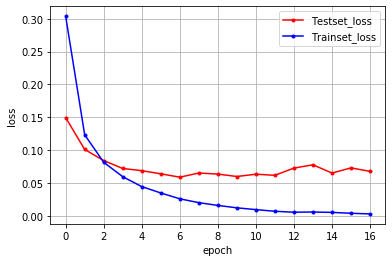

In [30]:
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']

# 학습 셋의 오차
y_loss = history.history['loss']

#  그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker ='.', c = 'blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [31]:
# MNIST CNN
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import tensorflow as tf
import os 
import numpy as np

In [32]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [34]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [46]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [47]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam', 
             metrics = ['accuracy'])

In [48]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

In [49]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 30, batch_size = 200, verbose = 0, callbacks = [early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.05629, saving model to ./model/01-0.0563.hdf5

Epoch 00002: val_loss improved from 0.05629 to 0.04093, saving model to ./model/02-0.0409.hdf5

Epoch 00003: val_loss improved from 0.04093 to 0.04025, saving model to ./model/03-0.0402.hdf5

Epoch 00004: val_loss improved from 0.04025 to 0.03272, saving model to ./model/04-0.0327.hdf5

Epoch 00005: val_loss improved from 0.03272 to 0.03229, saving model to ./model/05-0.0323.hdf5

Epoch 00006: val_loss improved from 0.03229 to 0.02718, saving model to ./model/06-0.0272.hdf5

Epoch 00007: val_loss did not improve from 0.02718

Epoch 00008: val_loss did not improve from 0.02718

Epoch 00009: val_loss did not improve from 0.02718

Epoch 00010: val_loss did not improve from 0.02718

Epoch 00011: val_loss did not improve from 0.02718

Epoch 00012: val_loss did not improve from 0.02718

Epoch 00013: val_loss did not improve from 0.02718

Epoch 00014: val_loss improved from 0.02718 to 0.02689, saving 

In [50]:
# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 4s 358us/step

 Test Accuracy: 0.9931


In [51]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']
# 학습 셋의 오차
y_loss = history.history['loss']

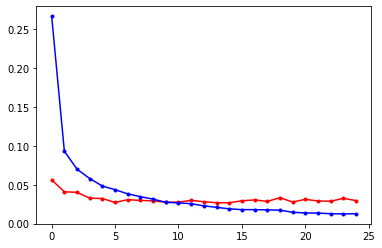

In [52]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

No handles with labels found to put in legend.


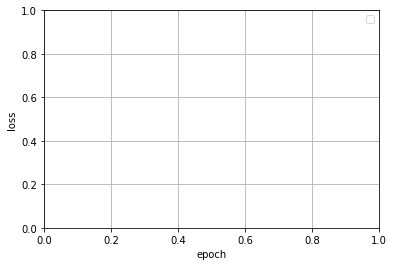

In [53]:
# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()